In [45]:
import numpy as np
from sympy import symbols, Matrix, simplify, pprint
import matplotlib.pyplot as plt
from pyscf import gto, scf
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')

import plottingsystem as pts


In [46]:
Hex135triene = """  
  C   -0.0000000    0.1921338   -3.0368170
  C   -0.0000000   -0.4370886   -1.8594235
  C    0.0000000    0.3177523   -0.5895615
  C    0.0000000   -0.3177523    0.5895615
  C   -0.0000000    0.4370886    1.8594235
  C   -0.0000000   -0.1921338    3.0368170
  H    0.0000000   -0.3814530   -3.9580663
  H    0.0000000    1.2766282   -3.0950180
  H   -0.0000000   -1.5237242   -1.8440075
  H   -0.0000000    1.4051056   -0.6177166
  H   -0.0000000   -1.4051056    0.6177166
  H   -0.0000000    1.5237242    1.8440075
  H    0.0000000   -1.2766282    3.0950180
  H    0.0000000    0.3814530    3.9580663
"""
# Converteer de coördinaten naar een NumPy-array
carbon_coordinates = pts.taking_carbon_coordinates(Hex135triene)
coordinates = pts.taking_x_and_y_coordinate(carbon_coordinates)
print(coordinates)


[[-3.036817   0.1921338]
 [-1.8594235 -0.4370886]
 [-0.5895615  0.3177523]
 [ 0.5895615 -0.3177523]
 [ 1.8594235  0.4370886]
 [ 3.036817  -0.1921338]]


In [47]:
hex135triene_molecule = gto.M(atom=Hex135triene, basis='sto-3g')#'sto-6g''ccpvdz'
px_indices = pts.taking_indices(hex135triene_molecule, ['C 2px'])
print(px_indices)
hf = scf.RHF(hex135triene_molecule)
hf_energy = hf.kernel()

[2, 7, 12, 17, 22, 27]


converged SCF energy = -228.962806176943


In [48]:
mo_coeff = hf.mo_coeff.round(6)
mo_coeff = pts.normaliseer(mo_coeff)

In [49]:
mo_eigenvalues = hf.mo_energy[[19,20, 21,22,23,24]]
print(mo_eigenvalues)
px_orbitals = mo_coeff[px_indices][:, [19,20, 21,22,23,24]]
print(px_orbitals)

[-0.41637724 -0.34105033 -0.23330785  0.21642313  0.34647871  0.44505371]
[[ 0.27845752 -0.47349579 -0.44653478  0.45465768 -0.4616484  -0.26505889]
 [ 0.39561072 -0.50772497 -0.29090027 -0.28311974  0.5122374   0.40358036]
 [ 0.51570686 -0.13422777  0.46474049 -0.46165962 -0.15650432 -0.5165914 ]
 [ 0.51570686  0.13422777  0.46474049  0.46165962 -0.15650432  0.5165914 ]
 [ 0.39561072  0.50772497 -0.29090027  0.28311974  0.5122374  -0.40358036]
 [ 0.27845752  0.47349579 -0.44653478 -0.45465768 -0.4616484   0.26505889]]


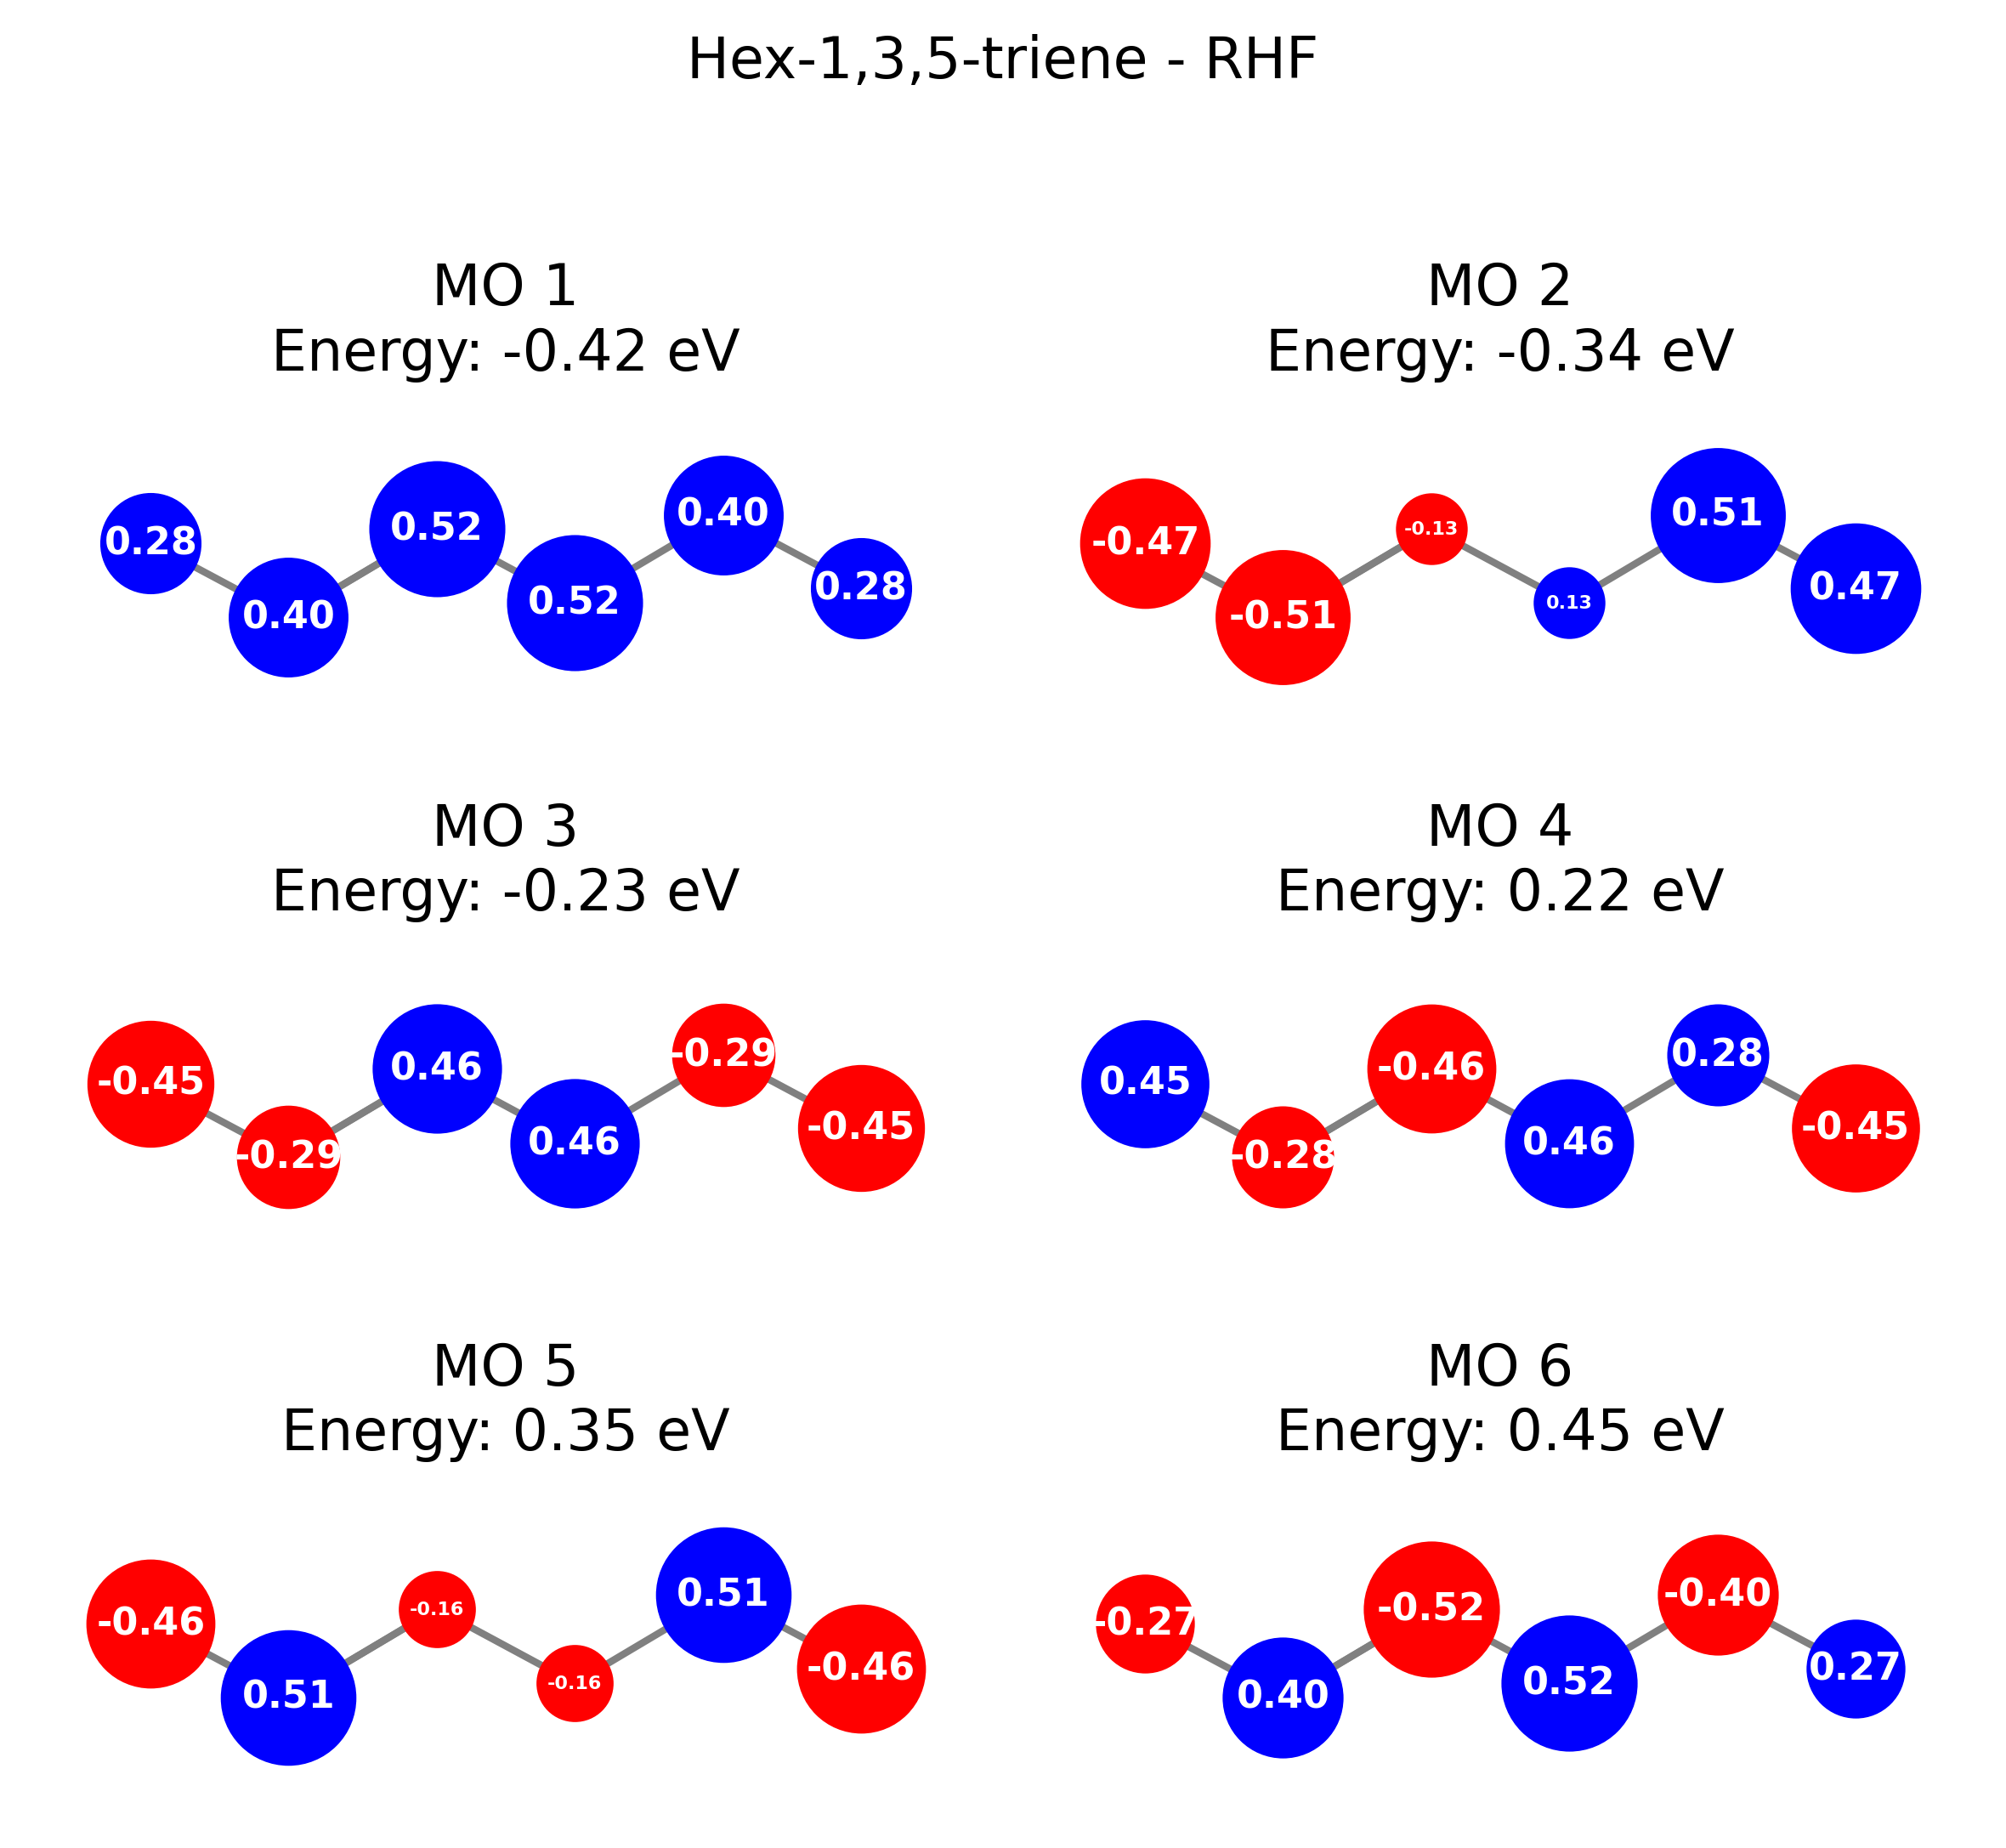

In [50]:
pts.plot_MOs(mo_eigenvalues, px_orbitals, coordinates, [(1,2)], 'Hex-1,3,5-triene', 'RHF', (6,6))

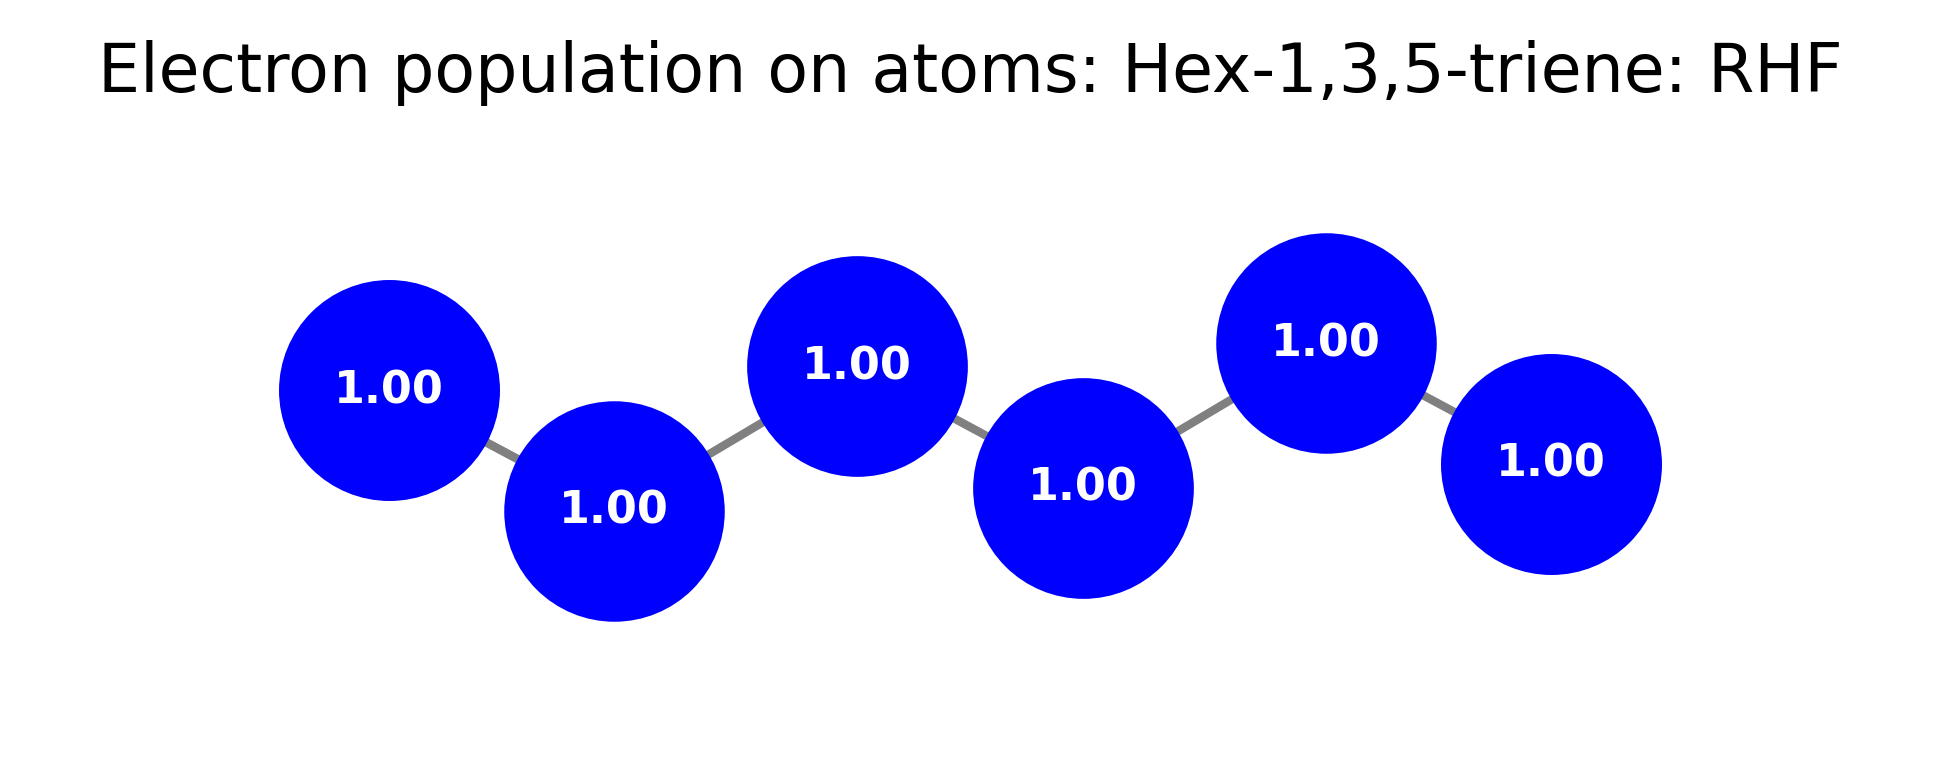

In [51]:
D_rhf = pts.making_D(px_orbitals, 6)
pts.plotting_of_D_atoms(6, coordinates, [(0,1)], D_rhf, 'Hex-1,3,5-triene', 'RHF', (6,2))

In [52]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel
hextriene = huckel(6, 0, -0.24, 'line')
hextriene.create_matrix()
huc_mat = hextriene.huckel_matrix

print(huc_mat)

[[ 0.   -0.24  0.    0.    0.    0.  ]
 [-0.24  0.   -0.24  0.    0.    0.  ]
 [ 0.   -0.24  0.   -0.24  0.    0.  ]
 [ 0.    0.   -0.24  0.   -0.24  0.  ]
 [ 0.    0.    0.   -0.24  0.   -0.24]
 [ 0.    0.    0.    0.   -0.24  0.  ]]


In [53]:
hextriene.solve_huckel_matrix()
eigenvalues = hextriene.eigenvalues
eigenvectors = hextriene.eigenvectors
print(eigenvalues)
print(eigenvectors)

[-0.432465 -0.299275 -0.10681   0.10681   0.299275  0.432465]
[[-0.23192084  0.4179067  -0.52112063  0.52112063  0.4179067   0.23192084]
 [-0.4179067   0.52112063 -0.23192084 -0.23192084 -0.52112063 -0.4179067 ]
 [-0.52112063  0.23192084  0.4179067  -0.4179067   0.23192084  0.52112063]
 [-0.52112063 -0.23192084  0.4179067   0.4179067   0.23192084 -0.52112063]
 [-0.4179067  -0.52112063 -0.23192084  0.23192084 -0.52112063  0.4179067 ]
 [-0.23192084 -0.4179067  -0.52112063 -0.52112063  0.4179067  -0.23192084]]


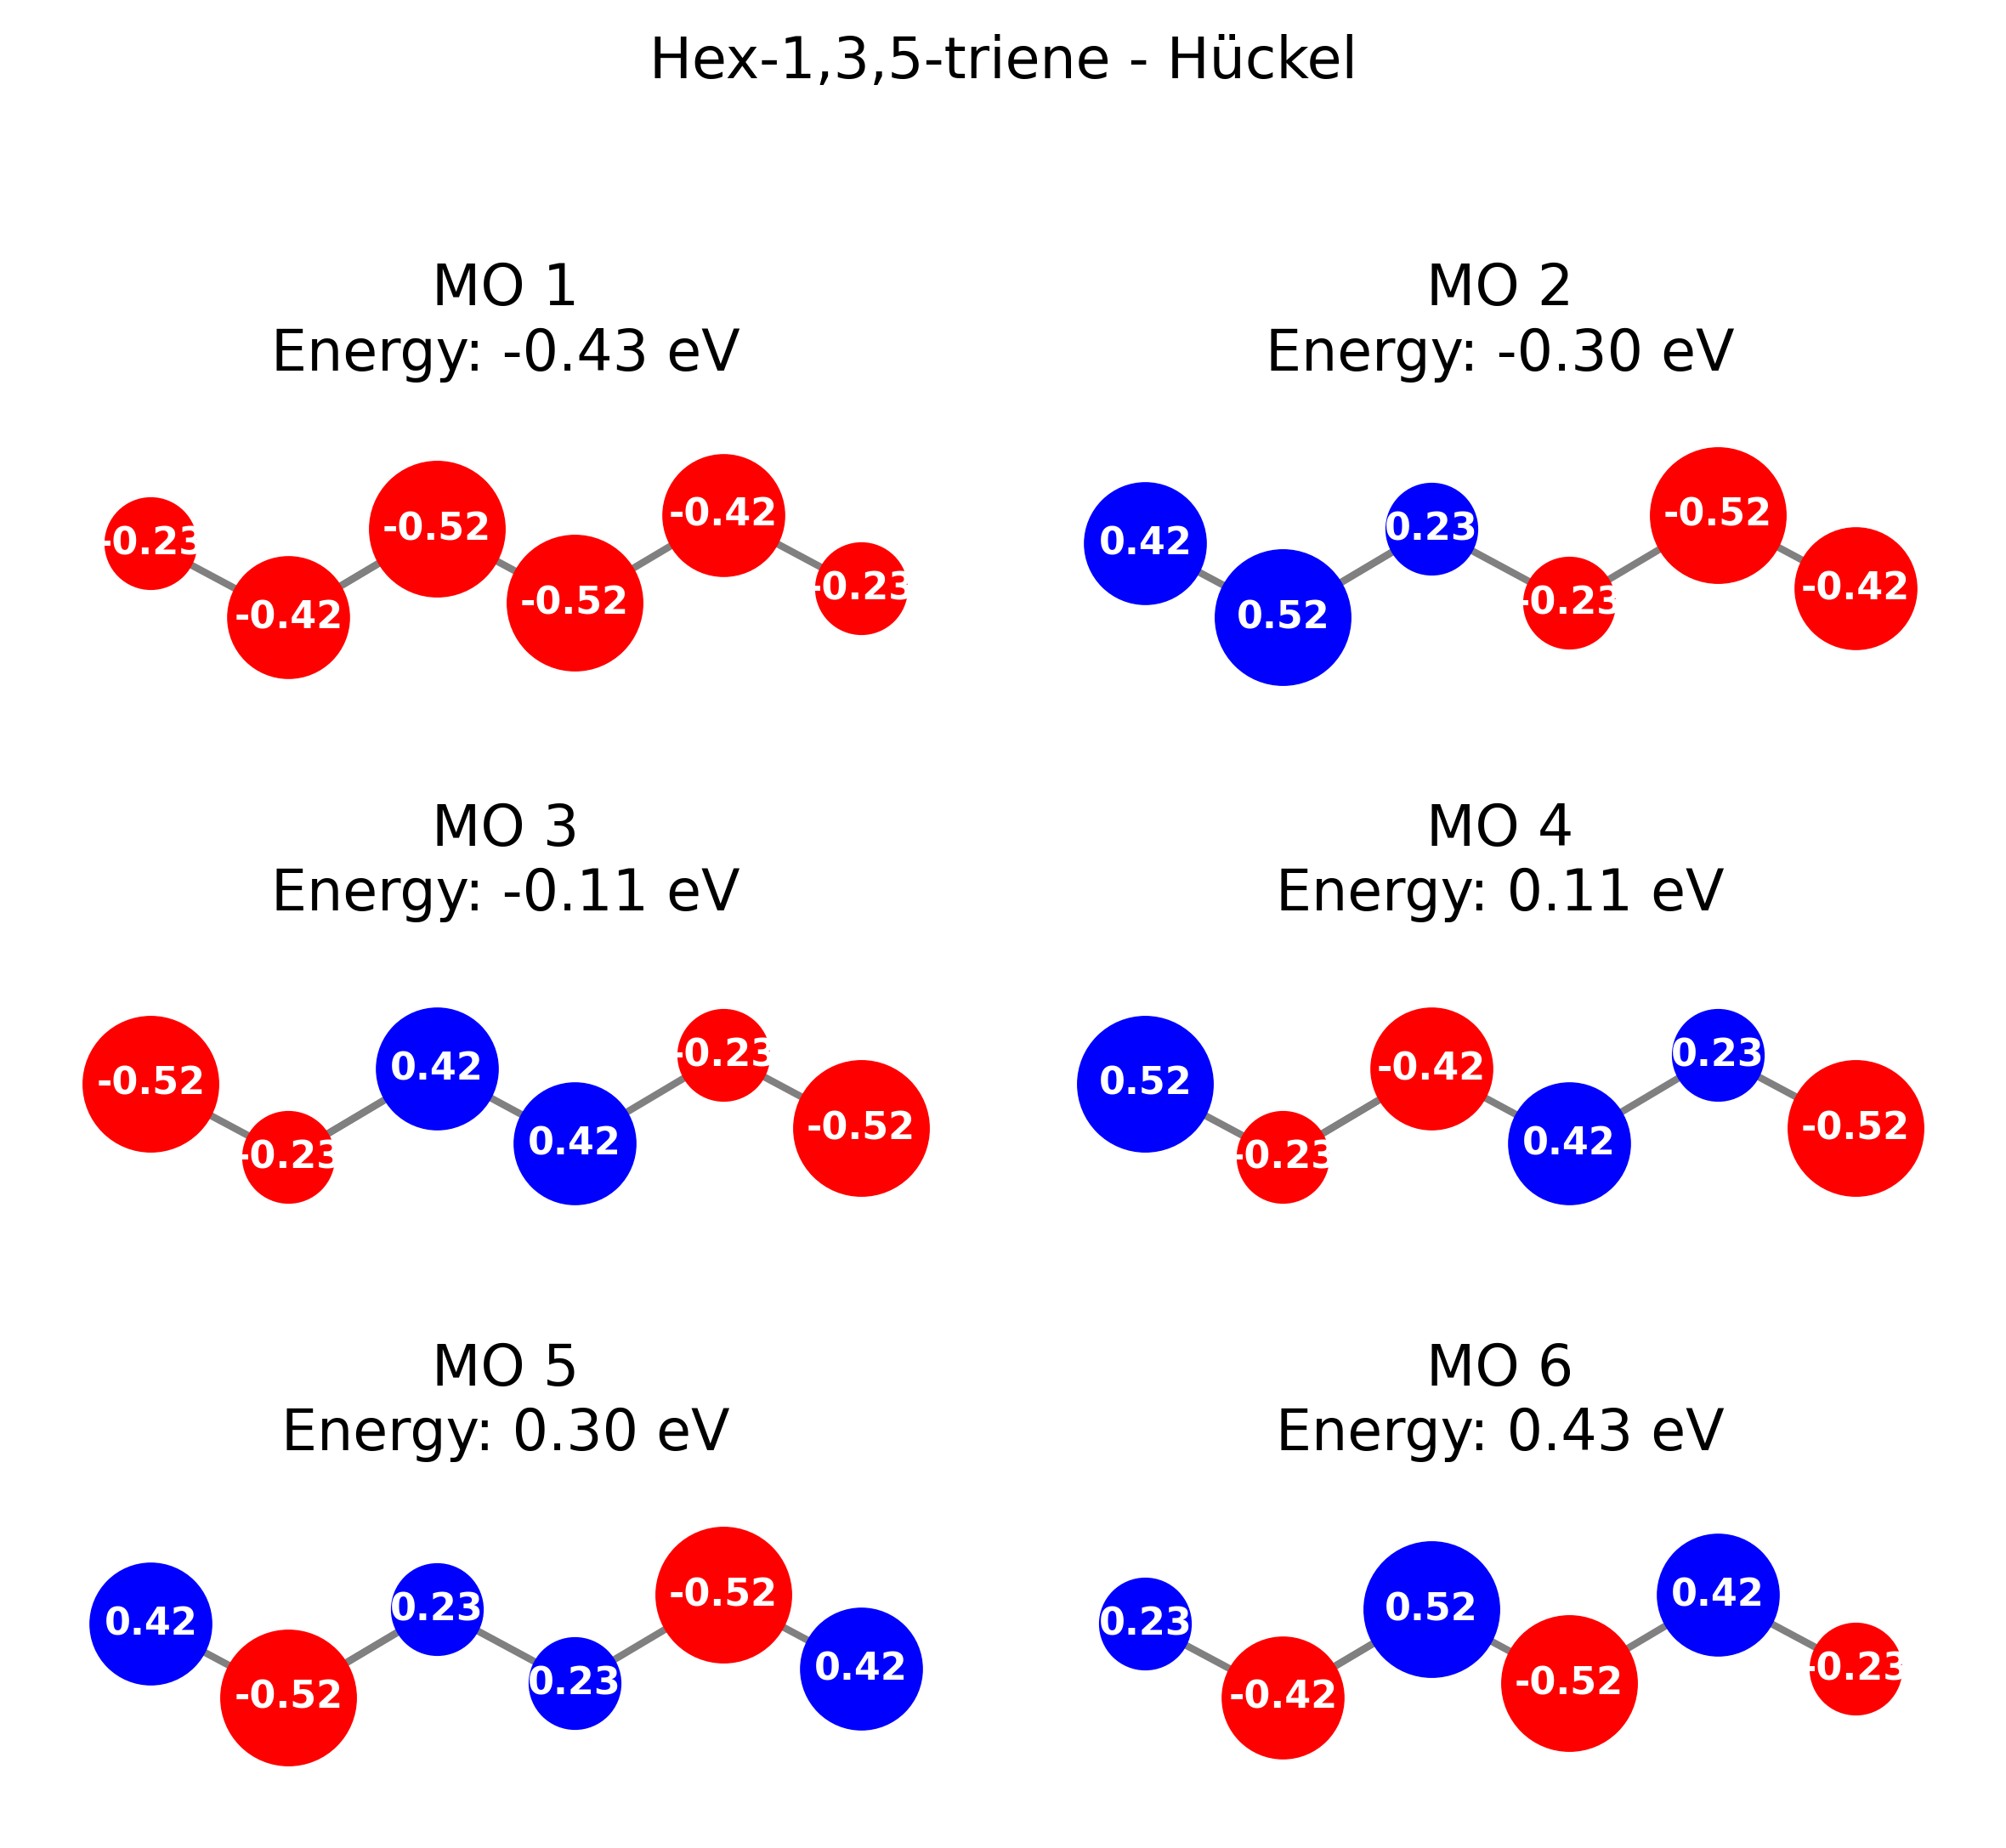

In [54]:
pts.plot_MOs(eigenvalues, eigenvectors, coordinates, [(1,2)], 'Hex-1,3,5-triene', 'Hückel', (6,6))

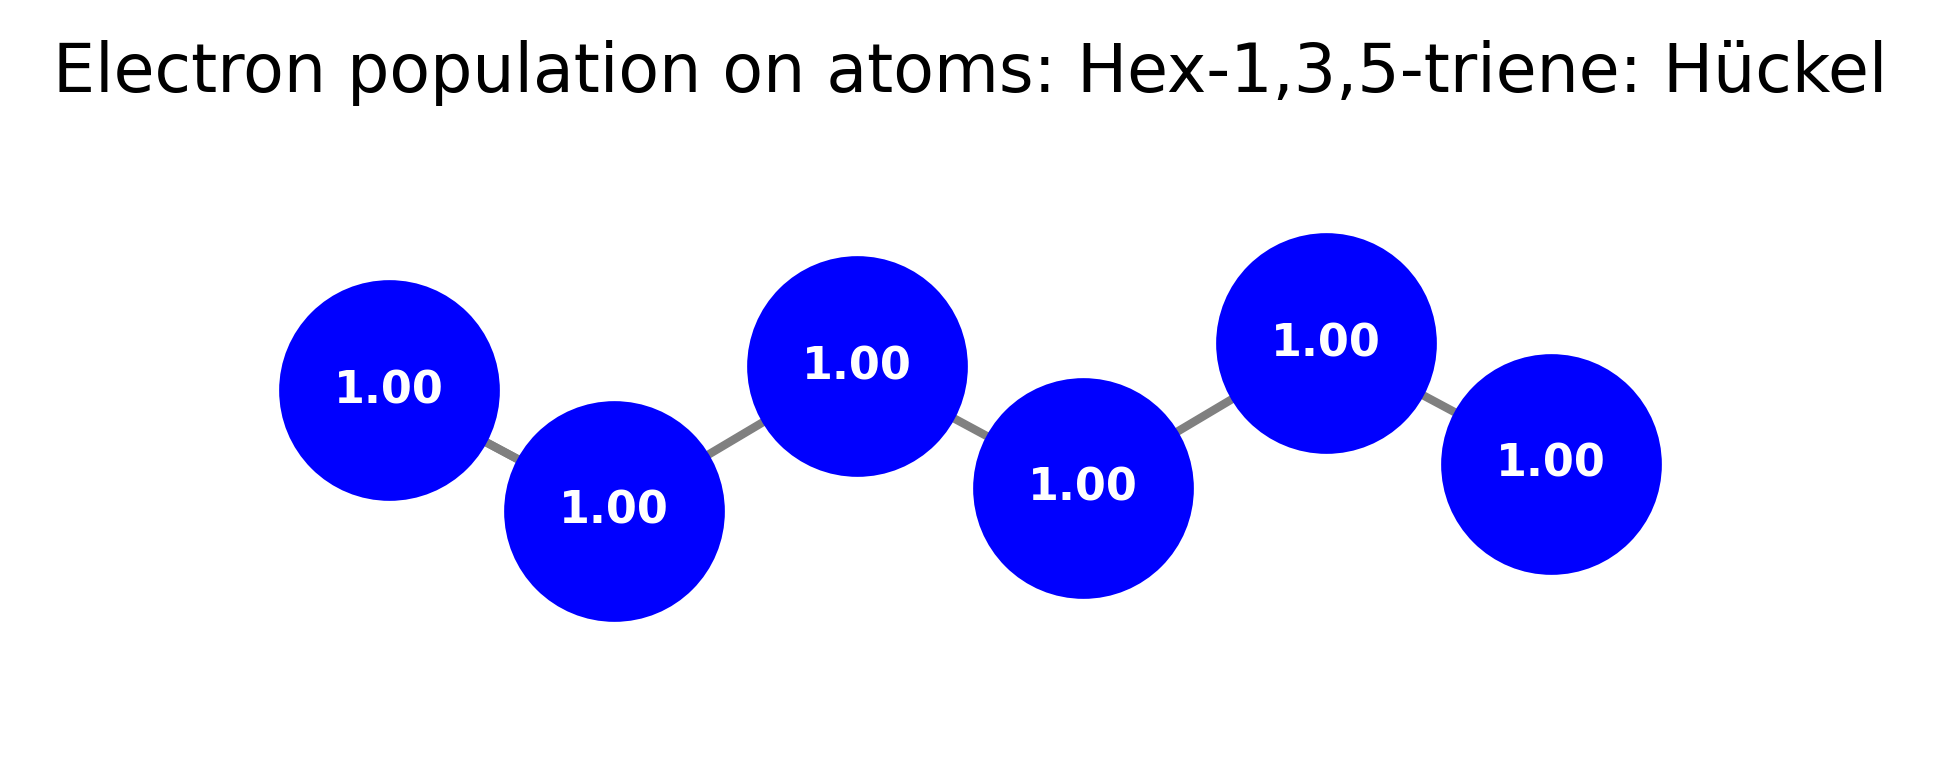

In [55]:
D_huc = pts.making_D(eigenvectors, 6)
pts.plotting_of_D_atoms(6, coordinates, [(0,1)], D_huc, 'Hex-1,3,5-triene', 'Hückel', (6,2))